## **Importing Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Loading Data**

In [2]:
df = pd.read_csv("/content/TelcoCustomerChurn.csv",index_col=0)

In [3]:
df

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,CLTV,Churn Reason,Churn Value
0,Paso Robles,93446.0,35.634222,-120.728341,Male,No,Yes,Yes,67.0,Yes,No,DSL,Yes,Yes,No,Yes,No,No,One year,No,Mailed check,60.05,3994.05,6148.0,NaN,No
1,Los Angeles,90005.0,34.059281,-118.307420,Female,No,No,No,53.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,NaN,No,No,Month-to-month,No,Electronic check,90.80,4921.20,5249.0,NaN,No
2,Potrero,91963.0,32.619465,-116.593605,Male,No,No,No,48.0,Yes,Yes,DSL,Yes,No,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),78.75,3682.45,2257.0,NaN,No
3,Palmdale,93551.0,34.613476,-118.256358,Male,Yes,No,No,1.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.05,70.05,2469.0,NaN,No
4,Hood,95639.0,38.375325,-121.507935,Male,No,Yes,Yes,57.0,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.30,4018.35,4133.0,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4713,Orange,92866.0,33.784597,-117.844535,Female,No,No,No,15.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.10,302.45,4359.0,NaN,No
4714,San Francisco,94107.0,37.768881,-122.395521,Female,No,Yes,Yes,71.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Two year,Yes,Credit card (automatic),99.00,7061.65,4305.0,NaN,No
4715,San Dimas,91773.0,34.102119,-117.815532,Male,No,Yes,No,3.0,No,No phone service,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,35.15,99.75,2987.0,Attitude of support person,Yes
4716,Klamath River,96050.0,41.816595,-122.948287,Female,No,Yes,No,17.0,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,One year,No,Bank transfer (automatic),98.60,1704.95,5160.0,Moved,Yes


## **Exploratory Data Analysis**

In [4]:
len(df['City'].value_counts())

1117

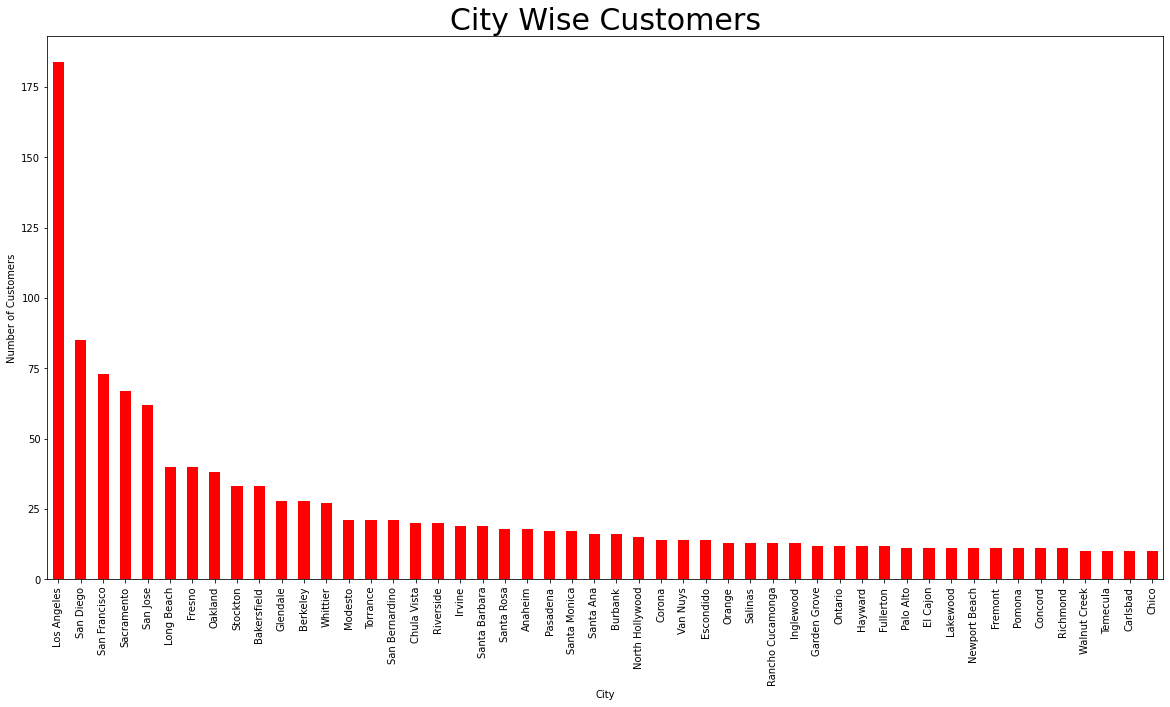

In [5]:
df_city = df['City'].value_counts()
df_city=df_city.head(50)
df_city.plot(kind='bar',figsize=(20,10),color='red')
plt.ylabel('Number of Customers')
plt.xlabel('City')
plt.title('City Wise Customers', fontsize = 30)
plt.show()

* Most Customers are from Los Angeles City

In [6]:
print(df.loc[(df['City']=='Los Angeles') & (df['Churn Value']=='Yes')].shape)
print(df.loc[(df['City']=='Los Angeles')].shape)

(53, 26)
(184, 26)


* Out of 184 Los Angeles Customers , 53 customers churn

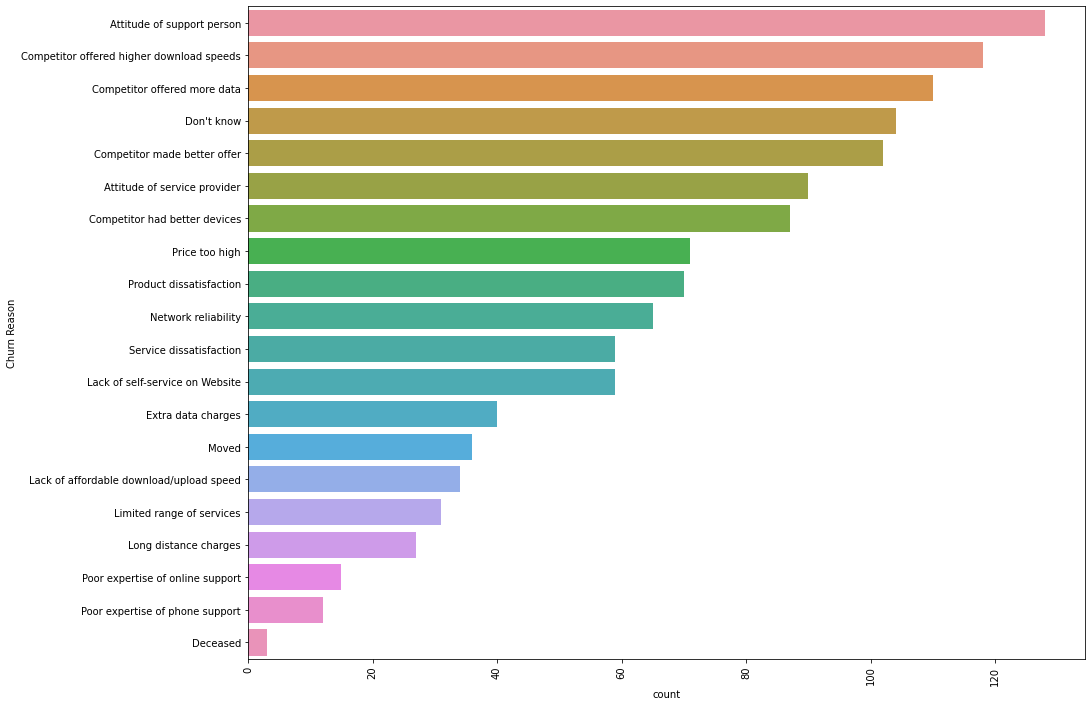

In [7]:

plt.figure(figsize=(15,12))
sns.countplot(y='Churn Reason',data=df,order=df['Churn Reason'].value_counts().index)
plt.xticks(rotation=90)

plt.show()

Top reasons of churn
* Attitude of support person
* Competitor offers higher download speeds

But Still there is large no of people who don't know their reason for churn

**Correlation Analysis**


In [8]:
mat=df.drop(["Zip Code","Latitude","Longitude"],axis=1)
corr_mat = mat.corr()
corr_mat

,Tenure Months,Monthly Charges,Total Charges,CLTV
Tenure Months,1.000000,0.249477,0.82623,0.399144
Monthly Charges,0.249477,1.000000,0.65226,0.108782
Total Charges,0.826230,0.652260,1.00000,0.350800
CLTV,0.399144,0.108782,0.35080,1.000000


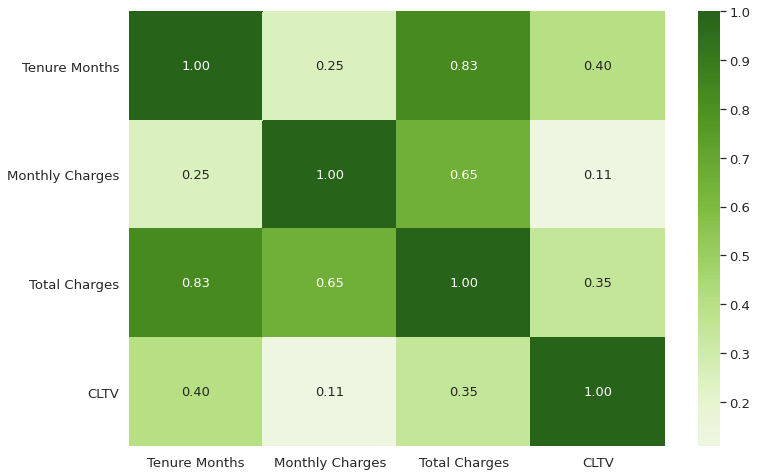

In [9]:
#create a heatmap to demonstrate the correlation magnitude among the variables
sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(corr_mat, xticklabels=corr_mat.columns, yticklabels=corr_mat.columns, annot=True, annot_kws={'fontsize':13},
            fmt=".2f", cmap='PiYG', center=0)

* CLTV is more coorealted with Tenure Months and Total Charges
* Total Charges is highly coorelated with Tenure Months

In [10]:
customer_churn=df.loc[(df['Churn Value']=='Yes')]
customer_nochurn=df.loc[(df['Churn Value']=='No')]


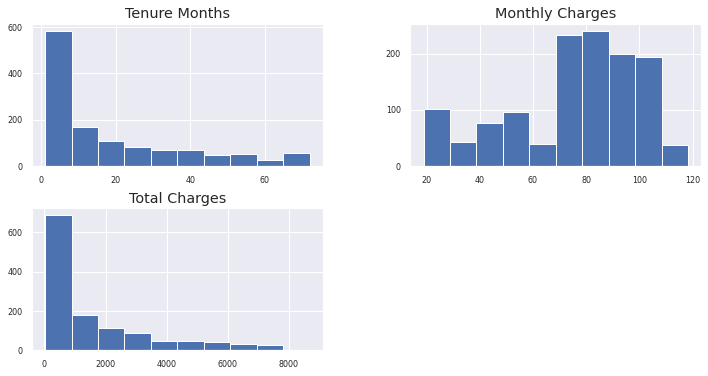

In [11]:
customer_churn[['Tenure Months', 
                  'Monthly Charges', 'Total Charges']].hist(figsize=(12, 6),bins=10, xlabelsize=8,
                                                                                   ylabelsize=8);  

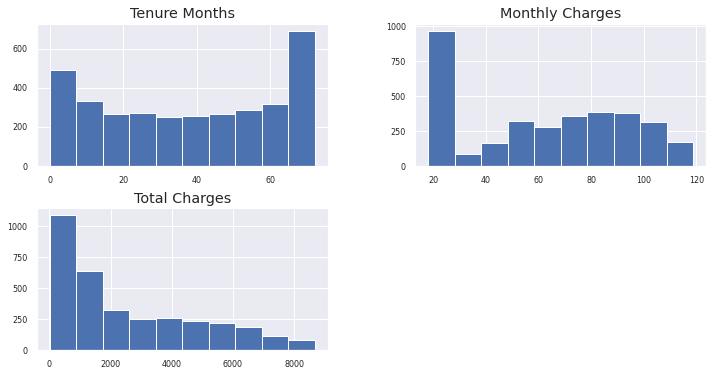

In [12]:
customer_nochurn[['Tenure Months', 
                  'Monthly Charges', 'Total Charges']].hist(figsize=(12, 6),bins=10, xlabelsize=8,
                                                                                   ylabelsize=8);  

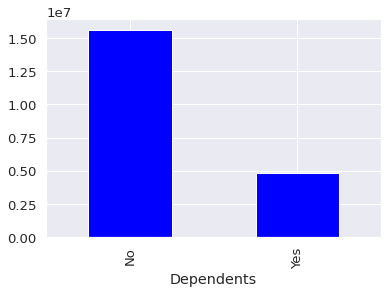

In [13]:
dfn = df.groupby(['Dependents'])['CLTV'].sum()
dfn.plot(kind='bar',color='blue')
plt.show()

* Customer without Dependents generate more revenue 

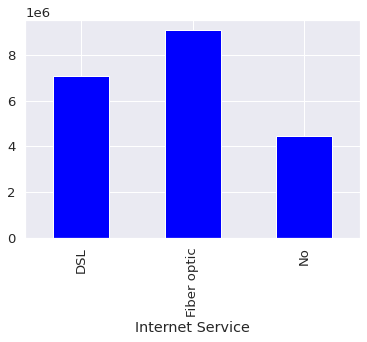

In [14]:
dfn = df.groupby(['Internet Service'])['CLTV'].sum()
dfn.plot(kind='bar',color='blue')
plt.show()

* Customer who opt for Fiber Optic generate more revenue

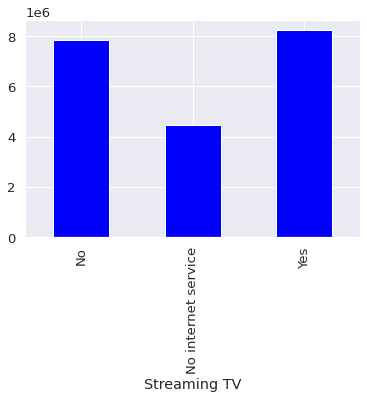

In [15]:
dfn = df.groupby(['Streaming TV'])['CLTV'].sum()
dfn.plot(kind='bar',color='blue')
plt.show()

* Customer with streaming TV generate more revenue

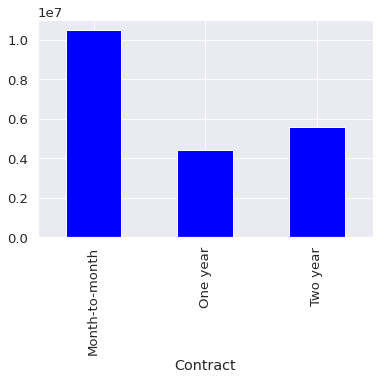

In [16]:
dfn = df.groupby(['Contract'])['CLTV'].sum()
dfn.plot(kind='bar',color='blue')
plt.show()

* Customer with Month-to-month contract generate more revenue

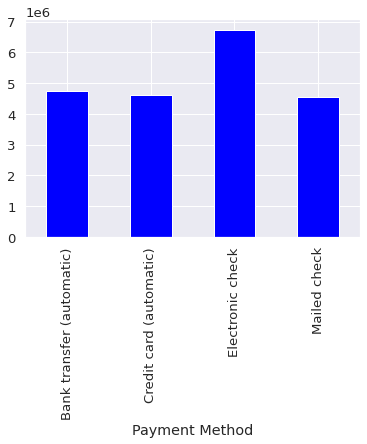

In [17]:
dfn = df.groupby(['Payment Method'])['CLTV'].sum()
dfn.plot(kind='bar',color='blue')
plt.show()

* Customers who paid with electronic check generate more revenue

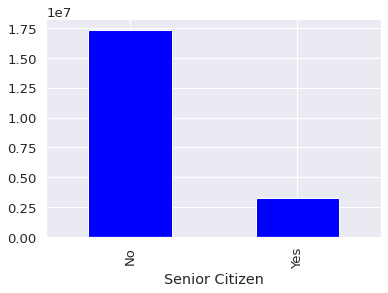

In [18]:
dfn = df.groupby(['Senior Citizen'])['CLTV'].sum()
dfn.plot(kind='bar',color='blue')
plt.show()

* Senior Citizen make less revenue

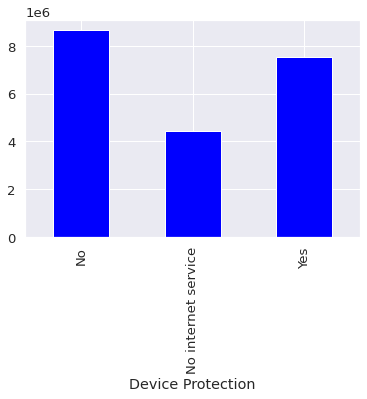

In [19]:
dfn = df.groupby(['Device Protection'])['CLTV'].sum()
dfn.plot(kind='bar',color='blue')
plt.show()

* Customers without device protection generates high revenue

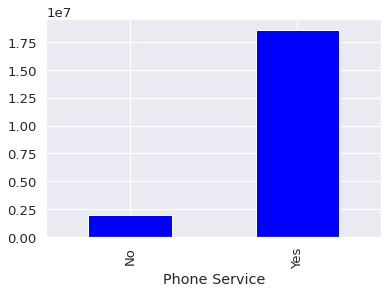

In [20]:
dfn = df.groupby(['Phone Service'])['CLTV'].sum()
dfn.plot(kind='bar',color='blue')
plt.show()

* Customers with phone service generates more revenue

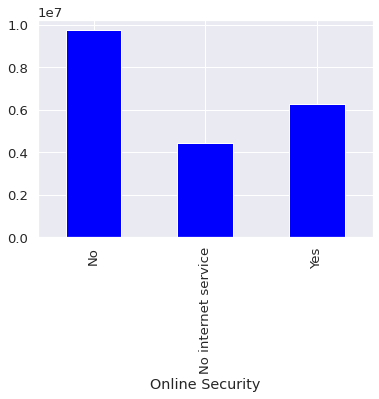

In [21]:
dfn = df.groupby(['Online Security'])['CLTV'].sum()
dfn.plot(kind='bar',color='blue')
plt.show()

* Customer without online security generate more revenue

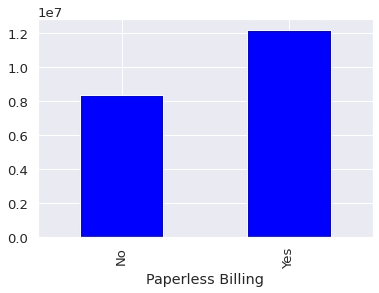

In [22]:
dfn = df.groupby(['Paperless Billing'])['CLTV'].sum()
dfn.plot(kind='bar',color='blue')
plt.show()


* Customers who do paperless billing generate more revenue